### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import scipy.stats as st
from scipy.stats import yeojohnson, boxcox
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from scipy.stats.mstats import winsorize

### Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\DS\note\10  Machine Learning\Phase - 02\32  Task\Brain-tumor-detection.csv')

In [3]:
df

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1
...,...,...,...,...,...,...,...,...,...,...
236,236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,(1.2328363649866522e-16+2.0133745759920343j),0
237,237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,(1.1025778731209189e-16+1.80064631514748j),0
238,238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,(1.815595306633918e-17+0.29650921521176654j),0
239,239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,(1.2673089388466744e-17+0.20696725614749073j),0


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


### Identifying Null values

In [6]:
df.isna().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

### Identifying and Removing Duplicates

In [7]:
df.duplicated().sum()

51

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
def comp_eccentric(x):
    if x.isnumeric()==True:
        return abs(complex(x))
    else:
        return abs(complex(x[1:-1]))
df['Eccentricity'] = df['Eccentricity'].apply(comp_eccentric)


# df['Class']=df['Class'].map({1:'Tumor detected',0:'No tumor detected'})
# df['Eccentricity'] = df['Eccentricity'].apply(lambda x: complex(x.replace('(', '').replace(')', '')))
# df['Eccentricity'] = df['Eccentricity'].apply(lambda x: np.sqrt(x.real**2 + x.imag**2))

In [11]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1.388168,1


In [12]:
df['Class']=df['Class'].map({1:'Tumor detected',0:'No tumor detected'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 190 non-null    float64
 1   Perimeter            190 non-null    float64
 2   Convex Area          190 non-null    float64
 3   Solidity             190 non-null    float64
 4   Equivalent Diameter  190 non-null    float64
 5   Major Axis           190 non-null    float64
 6   Minor Axis           190 non-null    float64
 7   Eccentricity         190 non-null    float64
 8   Class                190 non-null    object 
dtypes: float64(8), object(1)
memory usage: 14.8+ KB


In [14]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1.378312,Tumor detected
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.658266,Tumor detected
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1.335325,Tumor detected
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1.030671,Tumor detected
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1.388168,Tumor detected


In [15]:
df.columns

Index(['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter',
       'Major Axis', 'Minor Axis', 'Eccentricity', 'Class'],
      dtype='object')

### Identifying and Removing Outliers

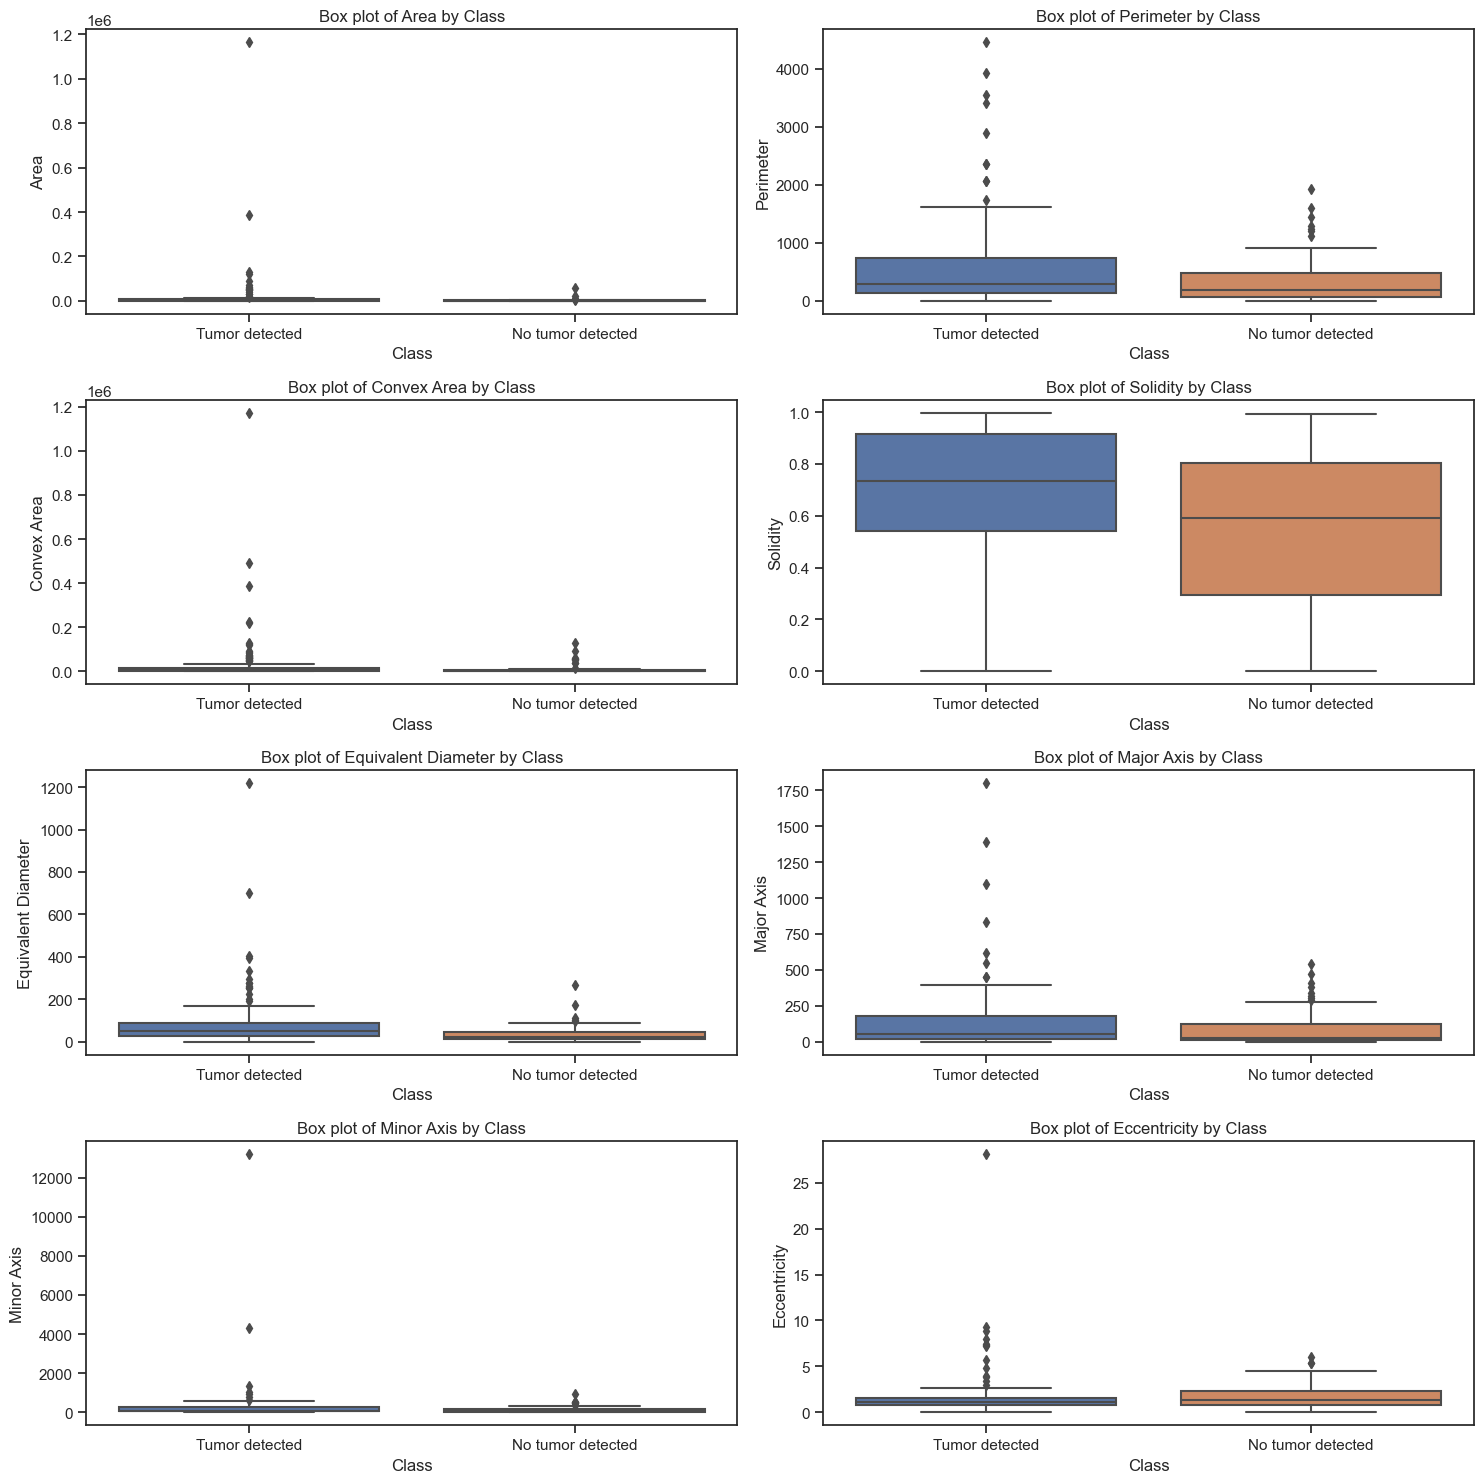

In [16]:
sns.set(style="ticks")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axes = axes.flatten()

features = ['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis', 'Eccentricity']

for i, j in enumerate(features):
    sns.boxplot(x='Class', y=j, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {j} by Class')

plt.tight_layout()
plt.show()

In [17]:
df = df.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) and x.name != 'Solidity' else x)

for col in df.select_dtypes(include=[np.number]):
    col_mean = df[col][~np.isinf(df[col])].mean()
    df[col].replace(np.inf, col_mean, inplace=True)  
    df[col].replace(-np.inf, col_mean, inplace=True) 

In [18]:
winsorization_factor = 0.05  

for col in df.select_dtypes(include=[np.number]):
    df[col] = winsorize(df[col], limits=(winsorization_factor, winsorization_factor))

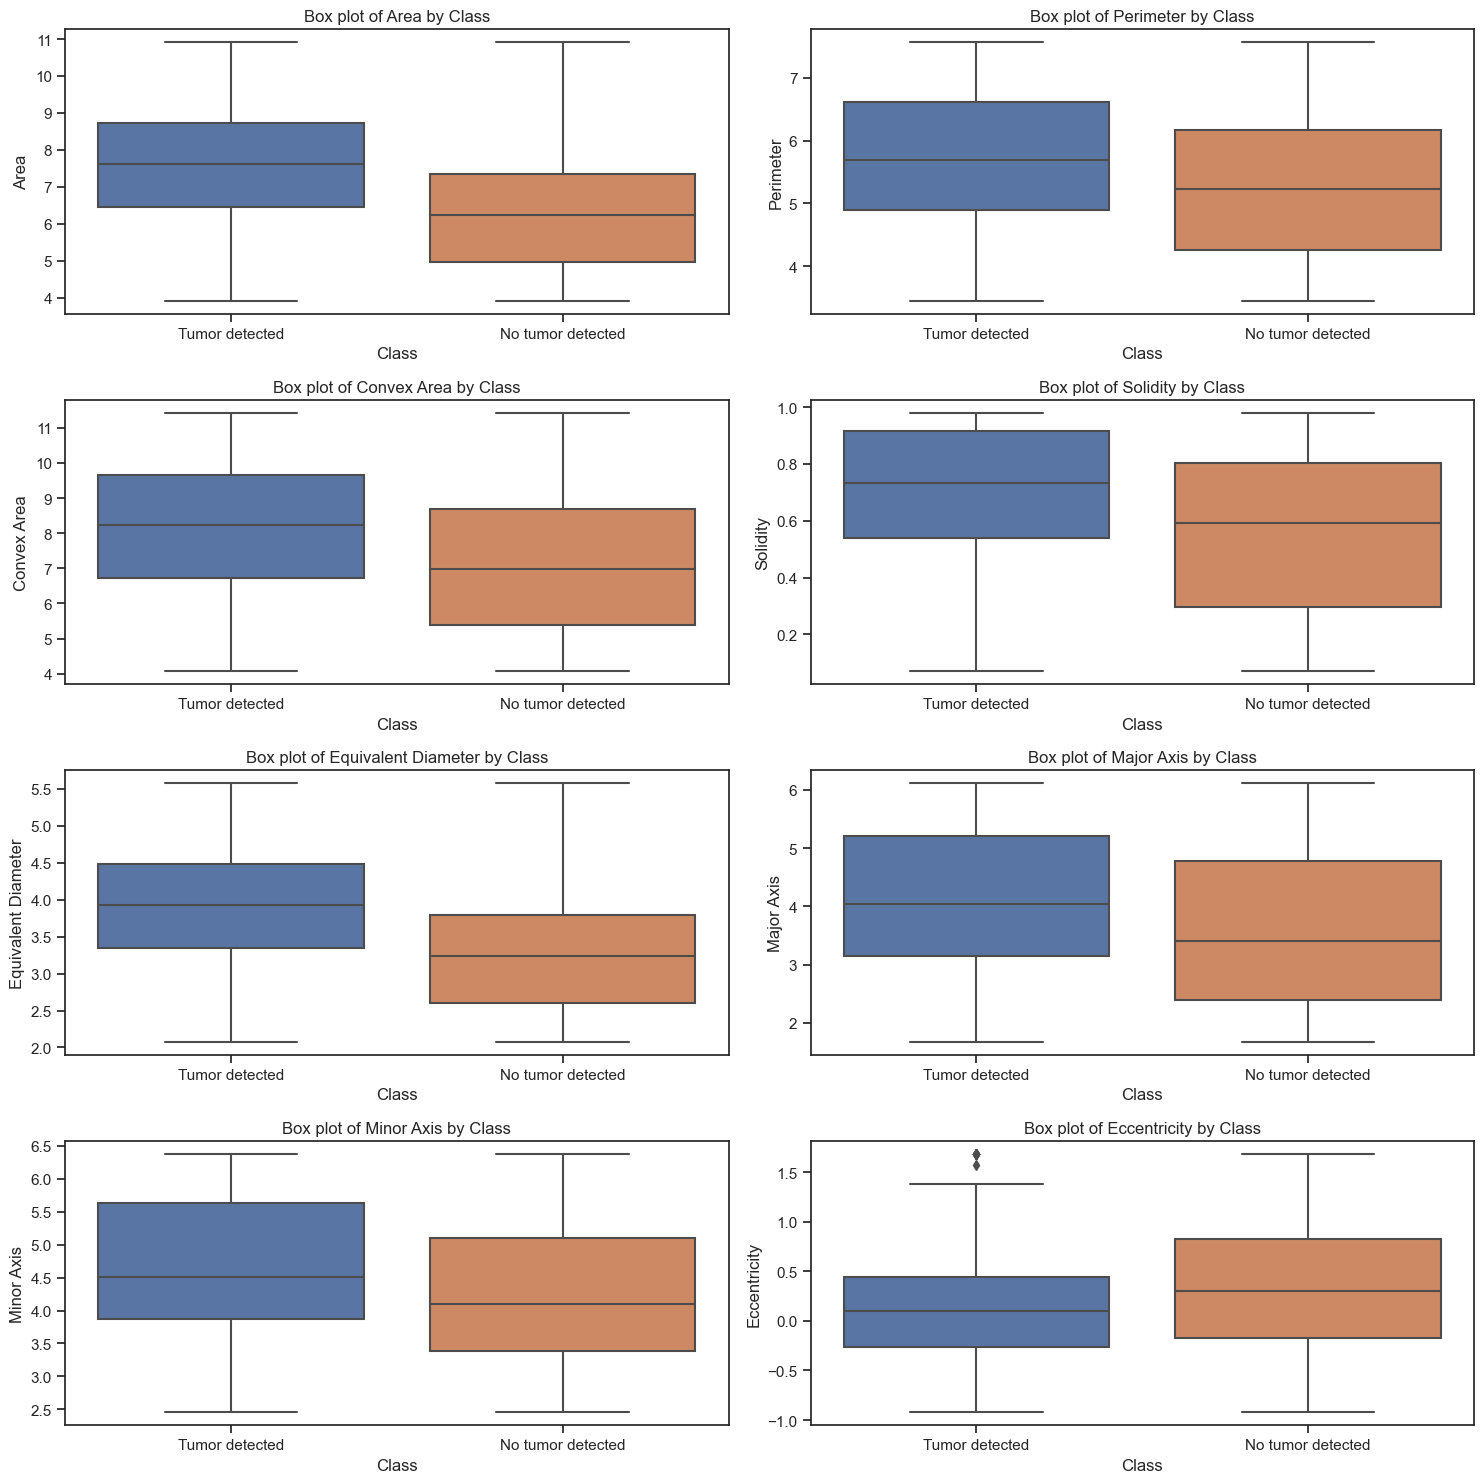

In [19]:
sns.set(style="ticks")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axes = axes.flatten()

features = ['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis', 'Eccentricity']

for i, j in enumerate(features):
    sns.boxplot(x='Class', y=j, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {j} by Class')

plt.tight_layout()
plt.show()

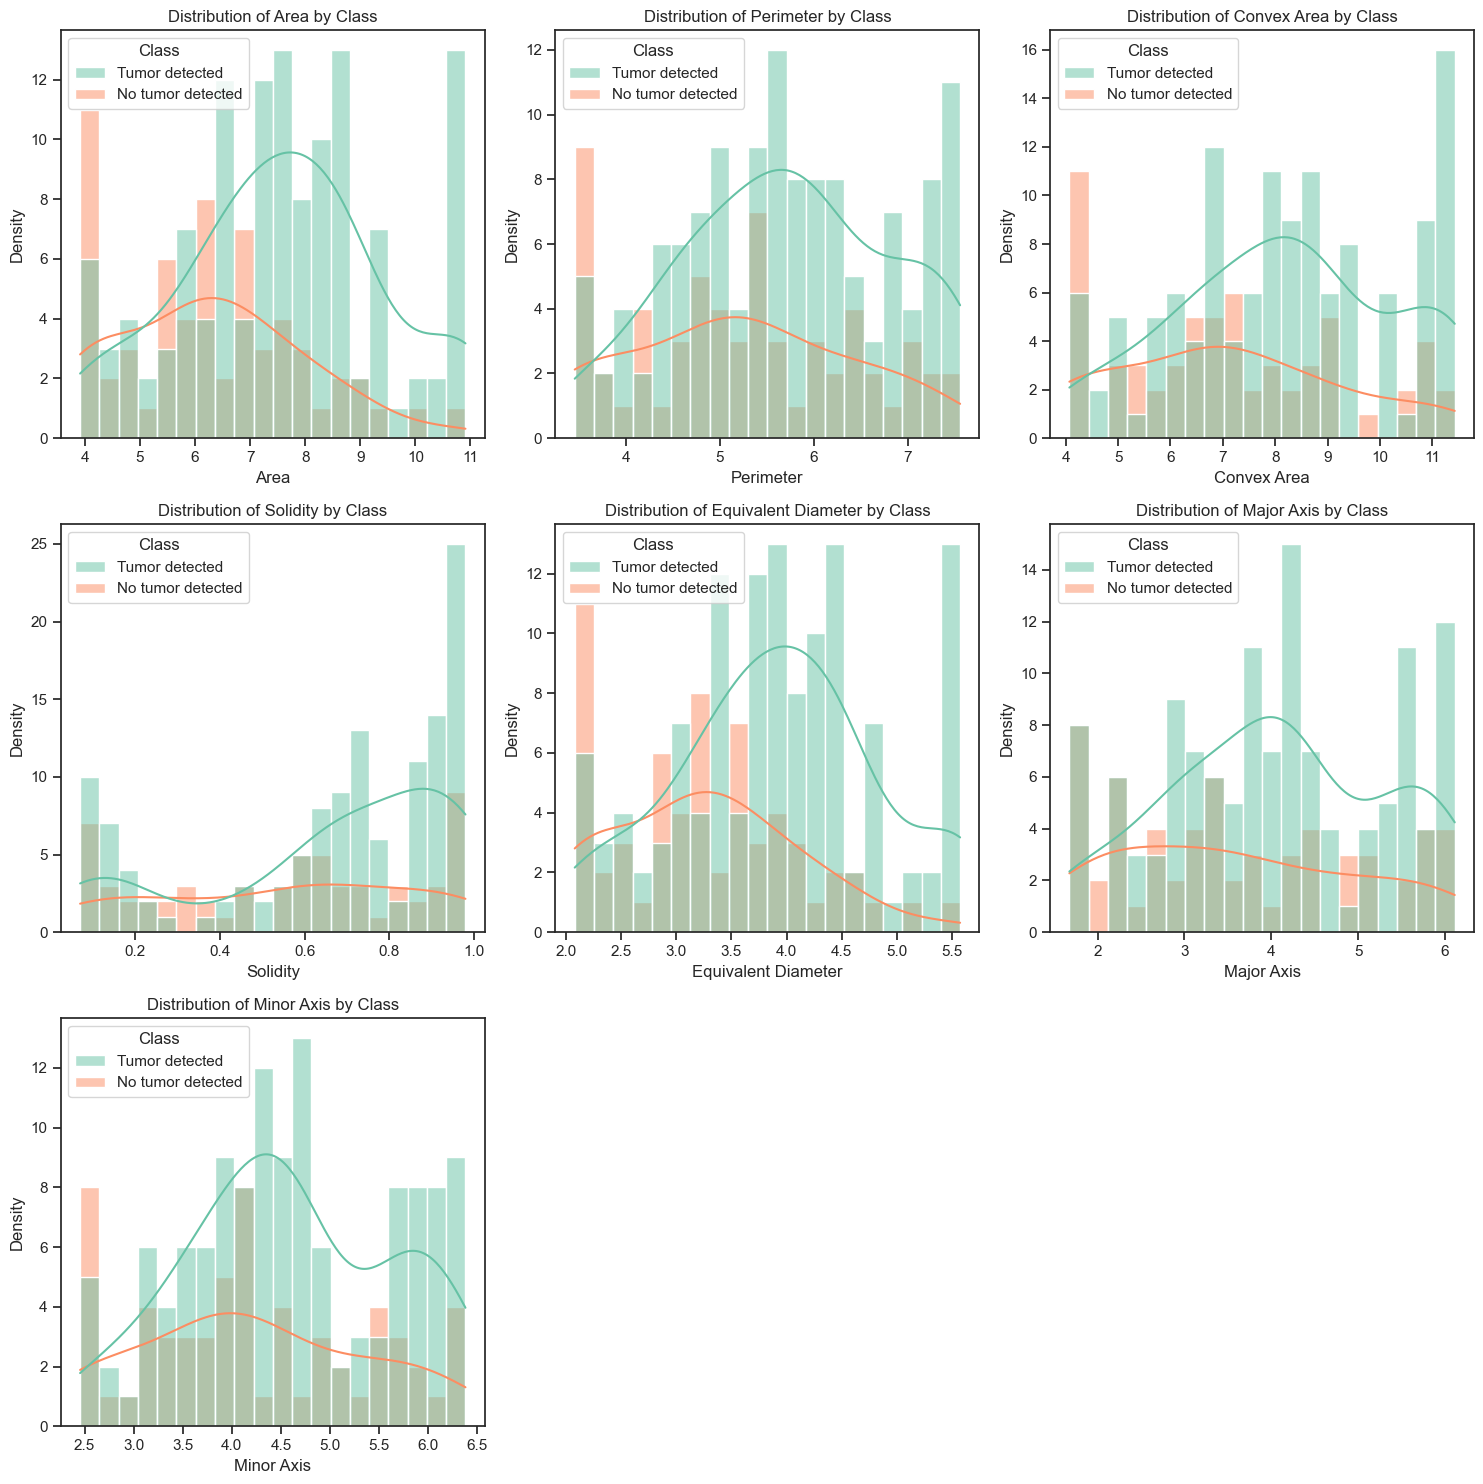

In [20]:
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

axes = axes.flatten()

for i, j in enumerate(features[:-1]):
    sns.histplot(data=df, x=j, hue='Class', kde=True, bins=20, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {j} by Class')
    axes[i].set_xlabel(j)
    axes[i].set_ylabel('Density')
    
for j in range(len(features)-1, nrows*ncols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

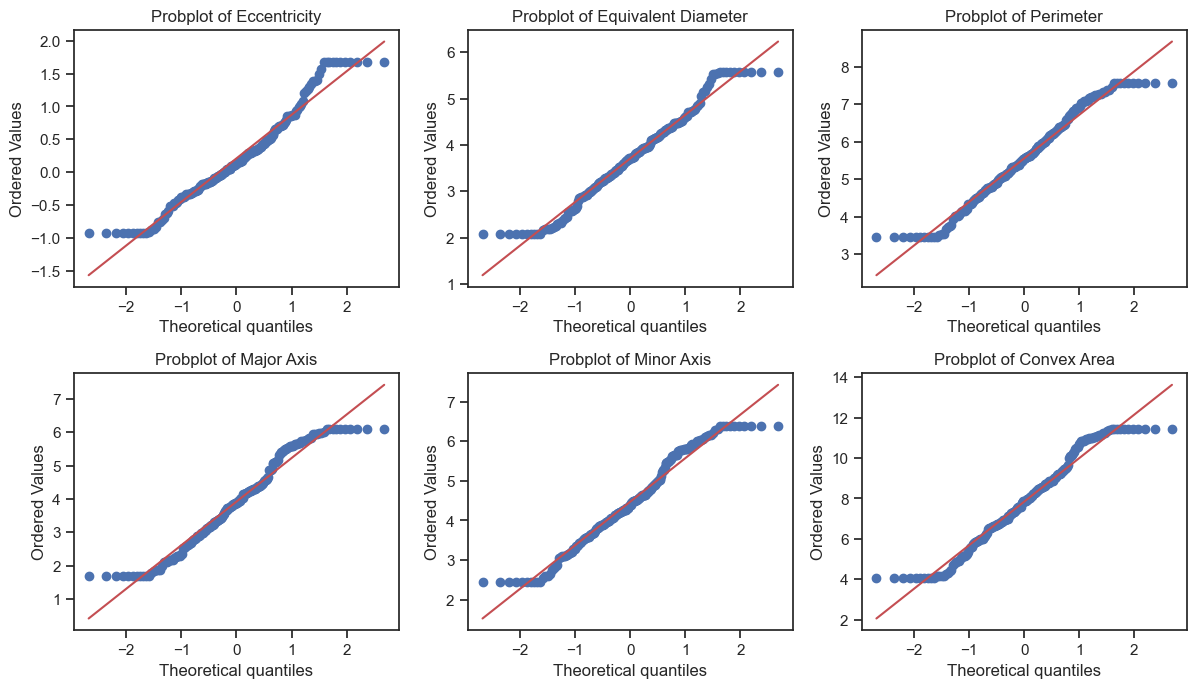

In [21]:
plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
st.probplot(df['Eccentricity'],plot=plt)
plt.title('Probplot of Eccentricity')

plt.subplot(3,3,2)
st.probplot(df['Equivalent Diameter'],plot=plt)
plt.title('Probplot of Equivalent Diameter')

plt.subplot(3,3,3)
st.probplot(df['Perimeter'],plot=plt)
plt.title('Probplot of Perimeter')

plt.subplot(3,3,4)
st.probplot(df['Major Axis'],plot=plt)
plt.title('Probplot of Major Axis')

plt.subplot(3,3,5)
st.probplot(df['Minor Axis'],plot=plt)
plt.title('Probplot of Minor Axis')

plt.subplot(3,3,6)
st.probplot(df['Convex Area'],plot=plt)
plt.title('Probplot of Convex Area')

plt.tight_layout()

plt.show()

### Splitting

In [22]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

### Scaling

In [24]:
std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train) , columns=std.get_feature_names_out())
std = StandardScaler()
X_test = pd.DataFrame(std.fit_transform(X_test) , columns=std.get_feature_names_out())

### Training and Prediction with Gaussian Naive Bayes Classifier

In [25]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [26]:
pd.crosstab(y_test, y_pred)

col_0,No tumor detected,Tumor detected
Class,,
No tumor detected,10,4
Tumor detected,6,28


In [27]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

No tumor detected       0.62      0.71      0.67        14
   Tumor detected       0.88      0.82      0.85        34

         accuracy                           0.79        48
        macro avg       0.75      0.77      0.76        48
     weighted avg       0.80      0.79      0.80        48



In [28]:
recall_score(y_test,y_pred,average=None)

array([0.71428571, 0.82352941])

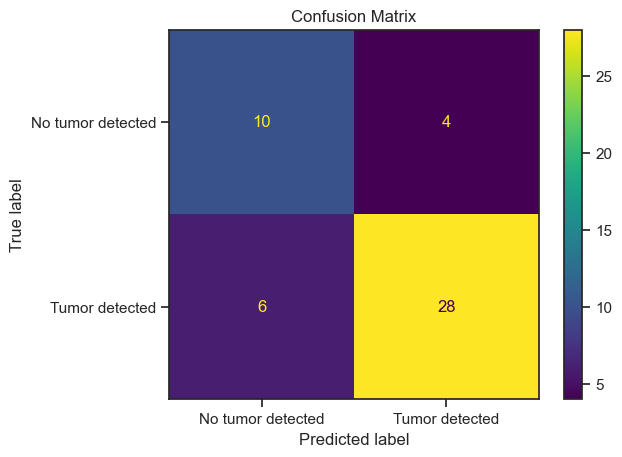

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=['No tumor detected', 'Tumor detected']).plot()
plt.title('Confusion Matrix')
plt.show()

In [32]:
filename='brain_tumor'
pickle.dump(gnb,open(filename,'wb'))

In [33]:
loaded_gnb=pickle.load(open(filename,'rb'))
loaded_gnb.predict(X_test)

array(['Tumor detected', 'Tumor detected', 'Tumor detected',
       'No tumor detected', 'Tumor detected', 'Tumor detected',
       'Tumor detected', 'Tumor detected', 'Tumor detected',
       'No tumor detected', 'Tumor detected', 'No tumor detected',
       'No tumor detected', 'Tumor detected', 'Tumor detected',
       'Tumor detected', 'Tumor detected', 'No tumor detected',
       'Tumor detected', 'No tumor detected', 'Tumor detected',
       'No tumor detected', 'Tumor detected', 'No tumor detected',
       'No tumor detected', 'Tumor detected', 'Tumor detected',
       'Tumor detected', 'Tumor detected', 'Tumor detected',
       'Tumor detected', 'No tumor detected', 'Tumor detected',
       'No tumor detected', 'No tumor detected', 'Tumor detected',
       'Tumor detected', 'No tumor detected', 'Tumor detected',
       'Tumor detected', 'Tumor detected', 'No tumor detected',
       'No tumor detected', 'Tumor detected', 'Tumor detected',
       'Tumor detected', 'No tumor detec